For this project I'll be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. Aim is to create a model that will help predict this.

Using lending data from 2007-2010 and trying to classify and predict whether or not the borrower paid back their loan in full. 

Data Overview:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [43]:
import pandas as pd
import numpy as np

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting the Data


In [45]:
loans = pd.read_csv('loan_data.csv')

In [46]:
loans.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [47]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [48]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


# Exploratory Data Analysis


<AxesSubplot:xlabel='fico', ylabel='Count'>

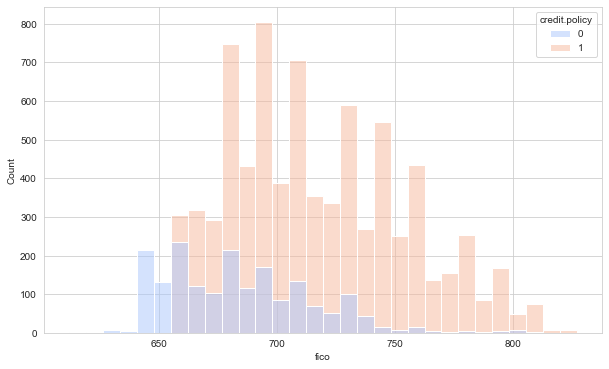

In [49]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.histplot(x='fico',data=loans,bins=30,hue='credit.policy',palette='coolwarm',legend=True)

Inference: Lower FICO score people generally do not clear criteria, as FICO score increases people tend to clear the criteria easily. Very few people have a very high FICO score.

In [50]:
loans['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

<AxesSubplot:xlabel='fico', ylabel='Count'>

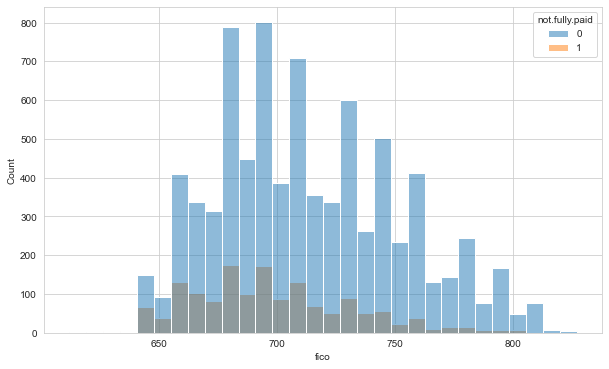

In [51]:
plt.figure(figsize=(10,6))
sns.histplot(x='fico',data=loans,hue='not.fully.paid',bins=30)

Interpretation: More or less the ditribution is same for the ones who fully paid and the ones who didn't fully pay

<AxesSubplot:xlabel='purpose', ylabel='count'>

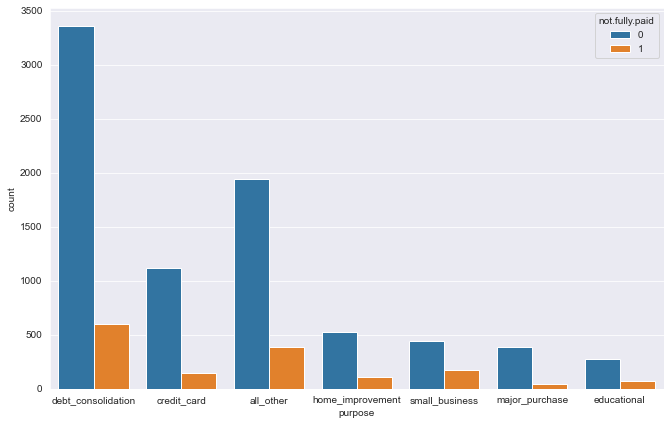

In [52]:
plt.figure(figsize=(11,7))
sns.set_style('darkgrid')
sns.countplot(x='purpose', data = loans, hue='not.fully.paid')

Interpretation: Most no. of payments are paid in debt consolidation purpose loans followed by all other. The purpose where most loans are not repayed are also debt consolidation but since the number of people are more in this category hence it is not entirely true. The purpose with lease no. of non repayment is in major purchases, meaning people with major purchases tend to payout.

** Exploring the trend between FICO score and interest rate.**

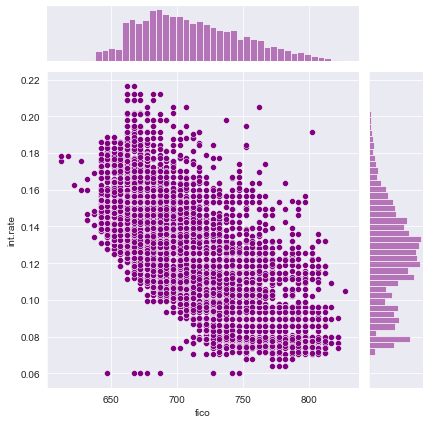

In [53]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple',marginal_kws=dict(alpha=0.5))

Interpretation: As the FICO score goes up the interest rate decreases, meaning that the borrower is more trustworthy pays less interest.

** Finding the trend between not.fully.paid and credit.policy. **

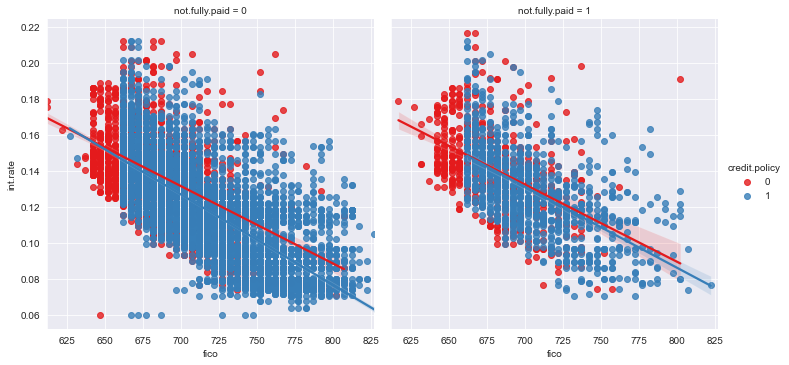

In [54]:
'''
g = sns.FacetGrid(col='not.fully.paid',data=loans)
g.map(plt.scatter,x='fico',y='int.rate')
'''
sns.lmplot(x='fico',y='int.rate',col='not.fully.paid',data=loans,hue='credit.policy',palette='Set1');

Interpretation: As of the graph depicting people who fully paid(left) mostly meet the criteria whose FICO score is above 660. The interest rate lowers a bit gradually as the FICO score increases for people not meeting the criteria as compared to those who did. For people who failed to pay the full amount(right graph), the trend of credit policy is similar to the left graph. In terms of linear relation of interest rate and FICO score there isn't much difference for people who met the criteria as compared to those who didn't.

# Setting up the Data


In [55]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [56]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Categorical Features

In [57]:
cat_feats = []

In [58]:
df = pd.get_dummies(loans,columns=['purpose'])
df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


## Train Test Split

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X = df.drop('not.fully.paid',axis=1)
y = df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Decision Tree Model

** Import DecisionTreeClassifier**

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt = DecisionTreeClassifier()

In [63]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Created predictions from the test set and created a classification report and a confusion matrix.**

In [64]:
y_pred = dt.predict(X_test)

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      2431
           1       0.20      0.26      0.22       443

    accuracy                           0.72      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.76      0.72      0.74      2874



[[1969  462]
 [ 329  114]]


## Training the Random Forest model

Random Forest is in the ensemble library of scikit learn since it's an ensemble of decision trees

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rfc = RandomForestClassifier(n_estimators=300)

In [69]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

## Predictions and Evaluation

** Predicting the class of not.fully.paid for the X_test data.**

In [70]:
y_pred2 = rfc.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [72]:
print(classification_report(y_test,y_pred2))
print('\n')
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.45      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.65      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



[[2419   12]
 [ 433   10]]


## Conclusion

Here although the precision has increased significantly but the recall and f1-score have gone down drastically. So we need to see which result is more accurate for our use-case by using the "Domain Knowledge" we can judge which result makes more sense to us.

Random Forest perfomed better in terms of Precision and F1-score accuracy, however, the Decision Tree perfomed better in terms of recall. 